In [39]:
import numpy as np

In [40]:
import pandas as pd

In [41]:
import matplotlib as mpl

In [42]:
import matplotlib.pyplot as plt

In [43]:
from matplotlib.animation import FuncAnimation

In [44]:
from sklearn.datasets import load_boston

In [45]:
from sklearn.metrics import mean_squared_error

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
from IPython.display import HTML

The steos involves in a solving a problem with amchine learning techniques

1. Data preprocessing
2. Define "Error"
3. Split the data into two types : Training and testing data
4. Train the model: This step involves "learining" the target function from the given data. Choose the appropriate machine learning algorithm. Train it on the data. Test the model with the testing data

5. Prediction: Obtain the predicted values for the given input and validate results


# Step1: Data Preprocessing
     
     Load the dataset

In [49]:
boston= load_boston()
# Description of the dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [50]:
features = pd.DataFrame(boston.data,columns=boston.feature_names)
features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [51]:
features['AGE']

0      65.2
1      78.9
2      61.1
3      45.8
4      54.2
       ... 
501    69.1
502    76.7
503    91.0
504    89.3
505    80.8
Name: AGE, Length: 506, dtype: float64

In [52]:
target = pd.DataFrame(boston.target,columns=["target"])
target

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [53]:
max(target['target'])

50.0

In [54]:
min(target['target'])

5.0

In [55]:
target.min()

target    5.0
dtype: float64

In [56]:
df = pd.concat([features,target],axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [57]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# calculate correlation between every column on the data

### method: pearson, kendall,spearman or callable 
        1.pearson: standard correlation coefficient
        2.kendall: kendall Tau correlation coefficient
        3.spearman: spearman rank correlation
        4.callable: callable with input two 1d arrays

In [58]:
corr = df.corr('pearson')
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


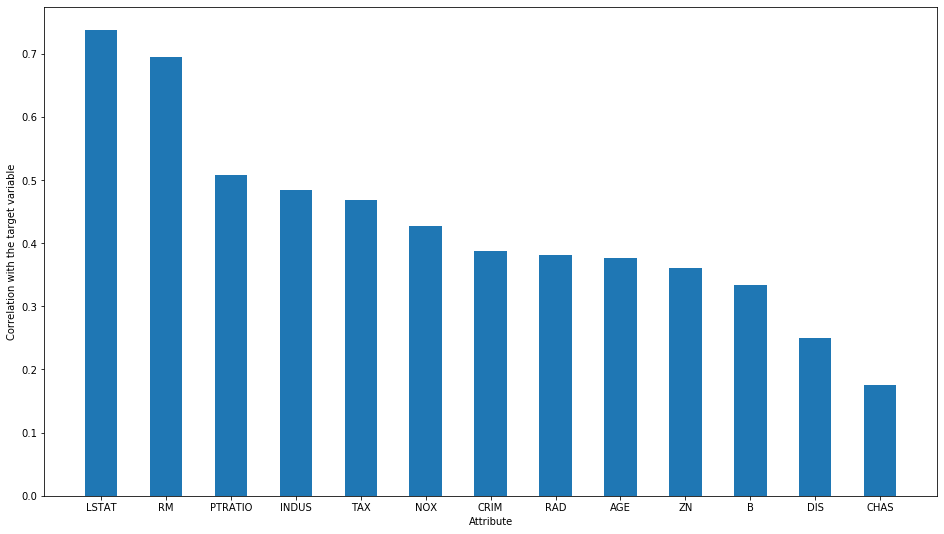

In [59]:
# Take absolute values of correlation
corrs = [abs(corr[attr]['target']) for attr in list(features)]
# Make a list of pairs [[cors,features]]
l= list(zip(corrs, list(features)))
# sort the list of pairs in revrese/descending order
# with the correlation valur as the key for sorting
l.sort(key=lambda x: x[0],reverse=True)
# 'unzip pairs to two lists'
# zip(*l) takes a list that looks like[[a,b,c] , [d,e,f],[g,h,i]]
# and returns [[a,d,g],[b,e,h],[c,f,i]]
corrs,labels = list(zip(*l))
# plot correlations with respect to the target variable as a bar graph
index= np.arange(len(labels))
plt.figure(figsize=(16,9))
plt.bar(index,corrs,width=0.5)
plt.xlabel('Attribute')
plt.ylabel('Correlation with the target variable')
plt.xticks(index,labels)
plt.show()

In [60]:
import seaborn as sns

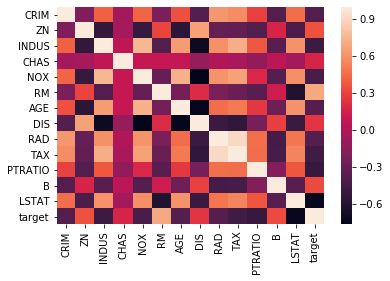

In [61]:
sns.heatmap(df.corr())

## Normalize the data

In [152]:
x= df['RM'].values
y= df ['target'].values

In [153]:
# Before normalization
print(y[:5])

[24.  21.6 34.7 33.4 36.2]


In [154]:
x_scaler = MinMaxScaler() # minmax scalar provides a method called inverse_transform() to obtain the values in original representation so that we can predict the true values and predicted values 
x= x_scaler.fit_transform(x.reshape(-1,1))
# fit transform function gives min and maax values it transforms the values the normalized values
# It can also be done in two steps by calling fit() function first computes min and max
# Then calling transform() function which transforms the values into normalized values
# The fit transform method expects the values column wise that is instead of horizontal it has to be vertical so we used reshape function of numpy
x= x[:,-1]
y_scalar = MinMaxScaler()
y= y_scalar.fit_transform(y.reshape(-1,1))
y = y[:,-1]

In [155]:
print(y[:5])

[0.42222222 0.36888889 0.66       0.63111111 0.69333333]


In [156]:
def error(m,x,c,t):
    N=x.size
    e = sum(((m*x+c)-t))
    return e * 1/(2*N)

In [157]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

# Equations to update weights
\begin{equation*}
gradient_m =
\sum_{i=1}^n(2* ((mx_k + c)-t_k)* x_k * learning rate
\end{equation*}
\begin{equation*}
gradient_c = 
\sum_{k=1}^n(2 * ((mx_k + c)-t_k) * learning rate)
\end{equation*}
\begin{equation*}
m = \ m- gradient_m
\end{equation*}
\begin{equation*}
c = \ c- gradient_c
\end{equation*}

These equations are implemented below in the update() function
grad_m and grad_c are calculated as  $ Vectorized $ $ operations $

In [158]:
def update(m,x, c, t , learning_rate):
    grad_m = sum(2 * ((m*x+c)-t)*x)
    grad_c = sum(2*((m*x+c)-t))
    m = m- grad_m * learning_rate
    c = c - grad_c * learning_rate
    return m,c

# **defining the gradient descent function**
Error threshold denotes the minimum exceptable value of error during the training phase if the error falls below the trainig phase we will stop the training phase 

**Error Threshold** : If the error falls below the threshold the gradient descent process is stopped and the weights are returned


In [159]:
def gradient_descent(init_m,init_c, x, t, learning_rate, iterations, error_threshold):
    m = init_m
    c = init_c
    error_values= list()
    mc_values = list()
    for i in range(iterations):
        e= error (m, x, c, t)
        if e < error_threshold:
            print("Error less than the threshold stopping gradient descent process")
            break
        error_values.append(e)
        m,c = update(m,x,c,t,learning_rate)
        mc_values.append((m,c))
    return m,c, error_values, mc_values


## The parameters may be changed to varied to observe the coputation vs accuracy trade offs.

 - $ Learning $ $ Rate $ : Incresing the learning rate reduces the convergence time. But , if the learning rate is too high the model will threshold the minima
    
 - $ Iterations $ : Number of iterations must be large enough to allow the model to converge to a minima, but if it is too large then the model becomes too specific to the training data thus cause overfitting i.e, the model "memorizes" the data instead of "learning" the data
     For this dataset , if you set the learning rate above 0.0025, it causes overflow. Reduce the learning rate and observe the error values.
  
 - $ Error $ $ treshold $ : This values can be set to a minimum  value of the error that is acceptable. When the error value goes below the threshold the gradient descent is stopped.
  
 - $ Initial $ $ values $ : For this problem where our objective is to determine the line which gives the least error, it does not matter what initial values you provide. But for non-convex optimization problems, initial values affect the learning process. We will elaborate on this when we learn neural networks.
     

In [160]:
%%time
init_m = 0.9
init_c = 0
learning_rate = 0.001
iterations = 250
error_threshold= 0.001

m,c,error_values, mc_values = gradient_descent(init_m,init_c, x_train, y_train, learning_rate, iterations, error_threshold)


Error less than the threshold stopping gradient descent process
Wall time: 9.96 ms


## $ Visualization $ $of$  $model$ $training $

### $init$ $function$

- $Purpose $ :
    - The callabck function initializes the graph
    - Draw the training data such that it is in the background and set the limits of the x and y axes
   
- $ Parameters$ :
    - None. This function does not take any parameters
   
- $ Returns$ :
    - The line object. To be returned because the FuncAnimation class requires that this function returns the line object.

### $ Update$ $function$:

- $ Purpose $:
    - To update each frame
    - Using the m and c valiues we compote the coordinates for th end points of the regression line
  
- $ Parameters $:
    - Frame number. The frame number will be used to index the mc_values array to access m and c values to compute the coordinate for the new frame.
   
- $ Return$:

    - The line object. To be returned because the FuncAnimation class requires that this function returns the line object.

###   <u> Visulization of error during training  </u>                                         
- Use the error_values array to plot the error values
- This is to observe how the error chamges during training. If the model is getting better, then the error must fall over the course of training.


### <u> Update function </u>

#### Animation may take a minute or more to get processed

#### Therefore select every 5th value (or a larger interval if you wish) to reduce the processing time.

In [161]:
# As the number of iterations increases changes in the line are less mutable
# Inorder to reduce the processing time for the animation it is advised to choose smaller value
mc_values_anim = mc_values[0:250:5]

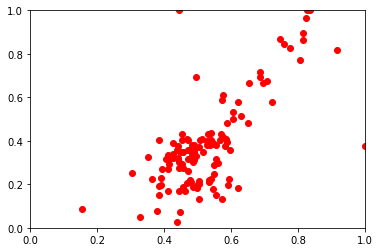

In [162]:
fig,ax = plt.subplots()
ln, = plt.plot([],[],'ro-',animated=True)
def init():
    plt.scatter(x_test,y_test,color="r")
    ax.set_xlim(0,1.0)
    ax.set_ylim(0,1.0)
    return ln,

def update_frame(frame):
    m , c  =mc_values_anim[frame]
    x1,y1 = -0.5, m * -.5 + c
    x2,y2 = 1.5, m * 1.5 + c
    # set the end points of the line
    ln.set_data([x1,x2],[y1,y2])
    return ln,
anim = FuncAnimation(fig,update_frame, 
                     frames = range(len(mc_values_anim)),
                     init_func = init,blit = True) # blit is related to the internal workings of matplotlib
# Generate the video of the animation that is shown in the jupyter notebook
#HTML(anim.to_HTML5_video())

### $ Error $ $ Visualization$

#### $ Visualization $ $ of $ $ the $ $ learning $ $ process$

1.  **Plot the regression line**  against the training data set to visualization what the line looks like for the trainig data set 

2. **Plot the error values** : This graph will show you how the error drops over time

3. **Plot the change in regression line throught the training process** : This graph helps you visualize how m and c values are update after each step

#### **Plotting the regression line upto the training data set** 

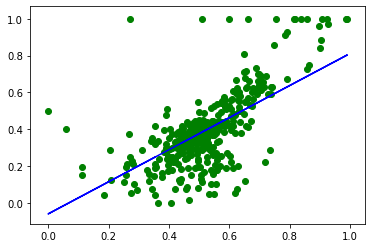

In [163]:
plt.scatter(x_train,y_train,color="g")
plt.plot(x_train,(m * x_train + c),color="b")

#### **Plotting error values**

Text(0.5, 0, 'Iterations')

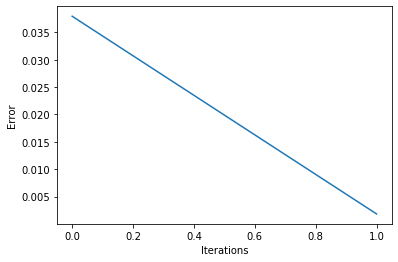

In [164]:
plt.plot(np.arange(len(error_values)),error_values)
plt.ylabel("Error")
plt.xlabel('Iterations')

### **$Prediction$ $of$ $ House$ $prices$**
### **$Prediction$ $-$ $The$ $steps$**  

1. Compute the predicted values for each x value using the line eqaution with the m and c values learned from gradient descent

2. Reshape predicted , xtest, and ytest arrays from a row to a column

3. Scale the predicted , xtest and ytest arrays and store then as predicted_scaled , xtext_scaled, ytest_scaled

4. Scaling adds an extra dimension to each of the arrays. Therefore remove it with a slicing operation.

## **<u>Code for the steps</u>**

predicted = (m* x_test)+c

predicted = predicted.reshaoe(-1,1)
x_test = x_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)

x_test_scaled = x_scaler.inverse_transform(x_test)
y_test_scaled = y_scaler.inverse_transfrom(y_test)
predicted_scaled = y_scaler.inverse_transfrom(predicted)

x_test_scaled = x_test_scaled[:,-1]
y_test_scaled = y_test_scaled[:,-1]
predicted_scaled = predicted_scaled[:,-1]

### **$Prediction$**

In [165]:
# calculate  the prediction on the test set as a vectorized operation
predicted = (m * x_test)+ c 

In [166]:
# Compute MSE for the predicted values on the testing set
mean_squared_error(y_test,predicted)

0.02317433126250501

In [167]:
# Put x_test, y_test and predicted values into a single a dataframe so that we
# can see the predicted values alongside the testing set
p = pd.DataFrame(list(zip(x_test,y_test,predicted)),columns=['x','target_y','predicted_y'])
p.head()

,x,target_y,predicted_y
0,0.532669,0.220000,0.404418
1,0.544357,0.384444,0.414615
2,0.606630,0.500000,0.468945
3,0.534010,0.211111,0.405588
4,0.390496,0.197778,0.280378


#### **Plot the predicted values against the target values**
- Predicted values are represented by the red colored line
- Target values are represented by blue coloured points

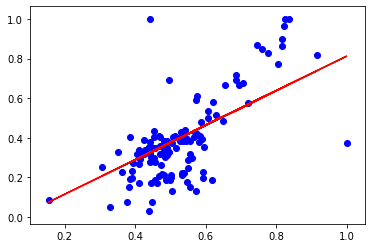

In [168]:
plt.scatter(x_test,y_test,color="b")
plt.plot(x_test,predicted,color="r")

In [169]:
# Reshape to change the shape that is required by the scalar
# predicted = np.array(predicted).reshape(-1,1) to denote one column
predicted = predicted.reshape(-1,1)
x_test = x_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)

x_test_scaled = x_scaler.inverse_transform(x_test)
y_test_scaled = y_scalar.inverse_transform(y_test)
predicted_scaled = y_scalar.inverse_transform(predicted)

# This is to remove the extra dimension
x_test_scaled = x_test_scaled[:,-1]
y_test_scaled = y_test_scaled[:,-1]
predicted_scaled = predicted_scaled[:,-1]
p = pd.DataFrame(list(zip(x_test_scaled,y_test_scaled,predicted_scaled)),columns=['x','target_y','predicted_y'])
p=p.round(decimals= 2)
p.head()

,x,target_y,predicted_y
0,6.34,14.9,23.20
1,6.40,22.3,23.66
2,6.73,27.5,26.10
3,6.35,14.5,23.25
4,5.60,13.9,17.62
